In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

In [2]:
from functions import dL_quadratic
from src.optimizer import AdamScratch2D, NonlocalSolverMomentumAdam
from src.utils import AdamPlotter
import matplotlib.pyplot as plt
import numpy as np

# CONDITIONS

In [3]:
lambda1, lambda2 = 1.0, 100.0
lr = 0.001
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
epochs = int(1e4)
initial_theta = [5.0, -5.0]

# DISCRETE-ADAM

In [4]:

optimizer = AdamScratch2D(
    dL = dL_quadratic,
    lr=lr,
    beta1=beta1,
    beta2=beta2,
    epsilon=epsilon,
    epochs=epochs
)

theta_history, m_history, v_history, iterations = optimizer.solve(
    theta_initial=initial_theta,
    function_parameters=(lambda1, lambda2)
    )

print(f"Valor final de theta: {theta_history[-1]}")


Epoch: 50, Error: 1.409793e-03
Epoch: 100, Error: 1.402904e-03
Epoch: 150, Error: 1.396023e-03
Epoch: 200, Error: 1.389220e-03
Epoch: 250, Error: 1.382493e-03
Epoch: 300, Error: 1.375842e-03
Epoch: 350, Error: 1.369264e-03
Epoch: 400, Error: 1.362758e-03
Epoch: 450, Error: 1.356323e-03
Epoch: 500, Error: 1.349956e-03
Epoch: 550, Error: 1.343656e-03
Epoch: 600, Error: 1.337421e-03
Epoch: 650, Error: 1.331250e-03
Epoch: 700, Error: 1.325141e-03
Epoch: 750, Error: 1.319092e-03
Epoch: 800, Error: 1.313102e-03
Epoch: 850, Error: 1.307168e-03
Epoch: 900, Error: 1.301290e-03
Epoch: 950, Error: 1.295464e-03
Epoch: 1000, Error: 1.289691e-03
Epoch: 1050, Error: 1.283966e-03
Epoch: 1100, Error: 1.278290e-03
Epoch: 1150, Error: 1.272660e-03
Epoch: 1200, Error: 1.267074e-03
Epoch: 1250, Error: 1.261530e-03
Epoch: 1300, Error: 1.256027e-03
Epoch: 1350, Error: 1.250563e-03
Epoch: 1400, Error: 1.245135e-03
Epoch: 1450, Error: 1.239743e-03
Epoch: 1500, Error: 1.234383e-03
Epoch: 1550, Error: 1.229054e-

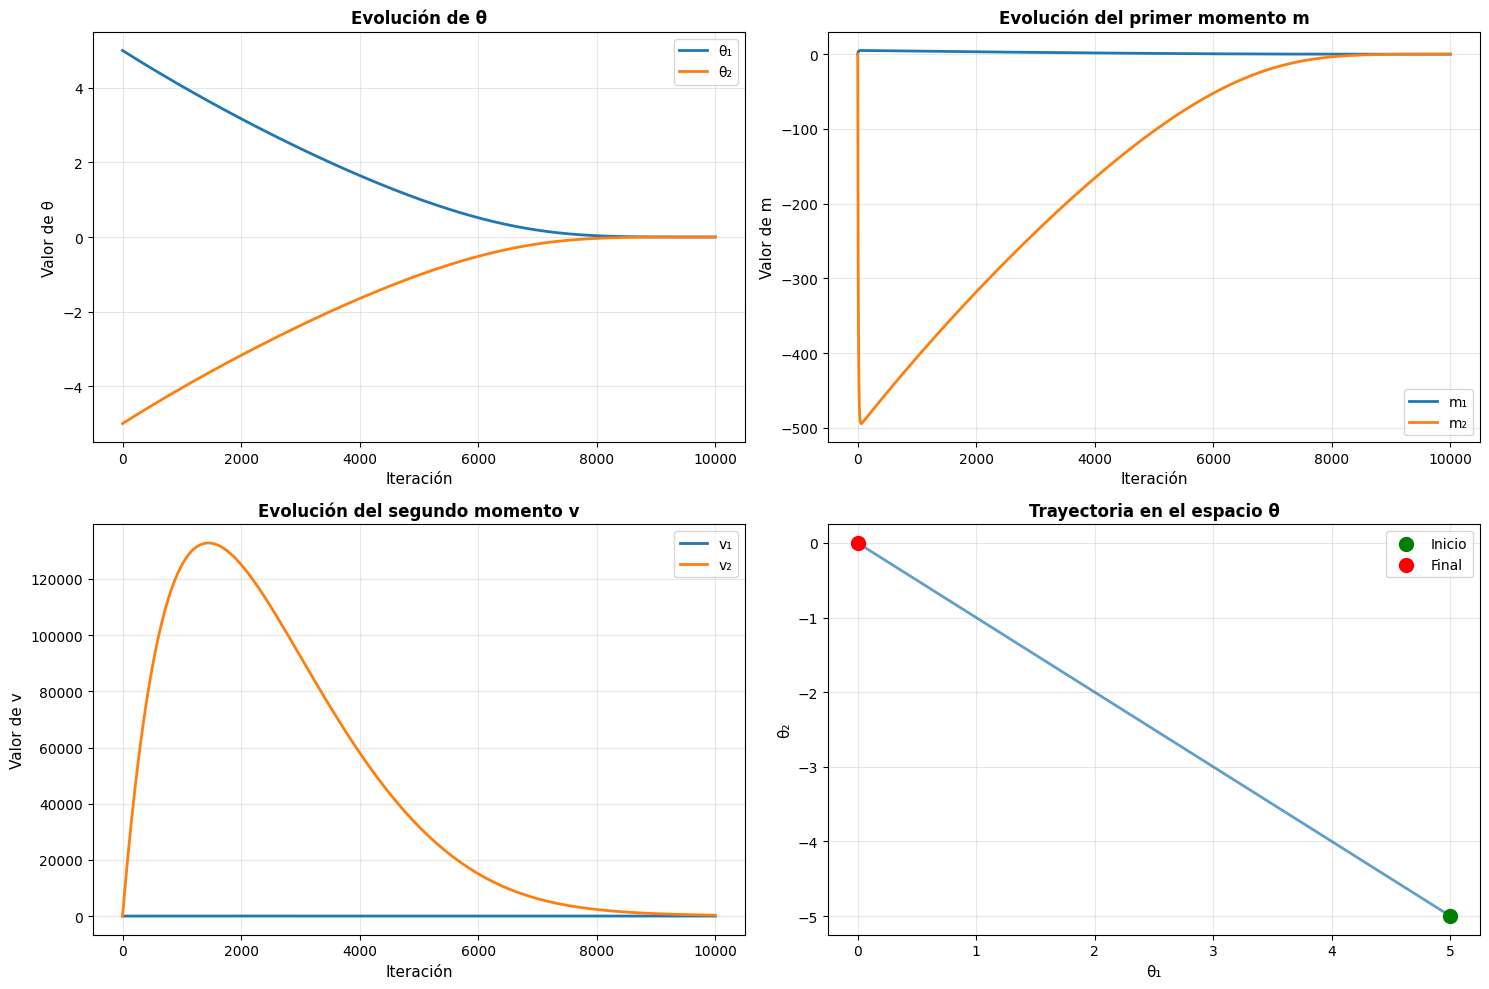

In [5]:
# Crear el plotter y visualizar
plotter = AdamPlotter(theta_history, m_history, v_history)

# Plotear todo
plotter.plot('all')
plt.show()

# CONTINUOUS ADAM

In [6]:
def dL_wrapper(theta):
    return dL_quadratic((lambda1, lambda2), theta)

In [7]:
print("Resolviendo theta1...")
optimizer_theta1 = NonlocalSolverMomentumAdam(
    dL=lambda theta: lambda1 * theta,  # Gradiente solo de theta1
    t_span=(1e-6, 10.0),
    y0=[5.0, 0],  # Condición inicial para theta1
    alpha=0.001,
    betas=(0.9, 0.999),
    eps_base=1e-8,
    verbose=True,
    quad_order=1000
)
t1, theta1_history = optimizer_theta1.solve()

# Resolver theta2 (segunda componente)
print("Resolviendo theta2...")
optimizer_theta2 = NonlocalSolverMomentumAdam(
    dL=lambda theta: lambda2 * theta,  # Gradiente solo de theta2
    t_span=(1e-6, 10.0),
    y0=[-5.0, 0],  # Condición inicial para theta2
    alpha=0.001,
    betas=(0.9, 0.999),
    eps_base=1e-8,
    verbose=True,
    quad_order=1000
)
t2, theta2_history = optimizer_theta2.solve()

# Combinar resultados
theta_history = np.column_stack([theta1_history, theta2_history])

print(f"\nValor final de theta: [{theta1_history[-1]:.6e}, {theta2_history[-1]:.6e}]")
print(f"Tiempo final: {t1[-1]}")
print(f"Número de pasos: {len(t1)}")

Resolviendo theta1...
Second order equation --> using sinh/sin kernels


/home/thebigmonster/Github/nonlocal-adam-type/src/optimizer/nonlocal_adam_solver.py:103: RuntimeWarning: overflow encountered in exp
  self._exp1 = np.exp(-self.lam1 * dt)


ValueError: x and y arrays must be equal in length along interpolation axis.